
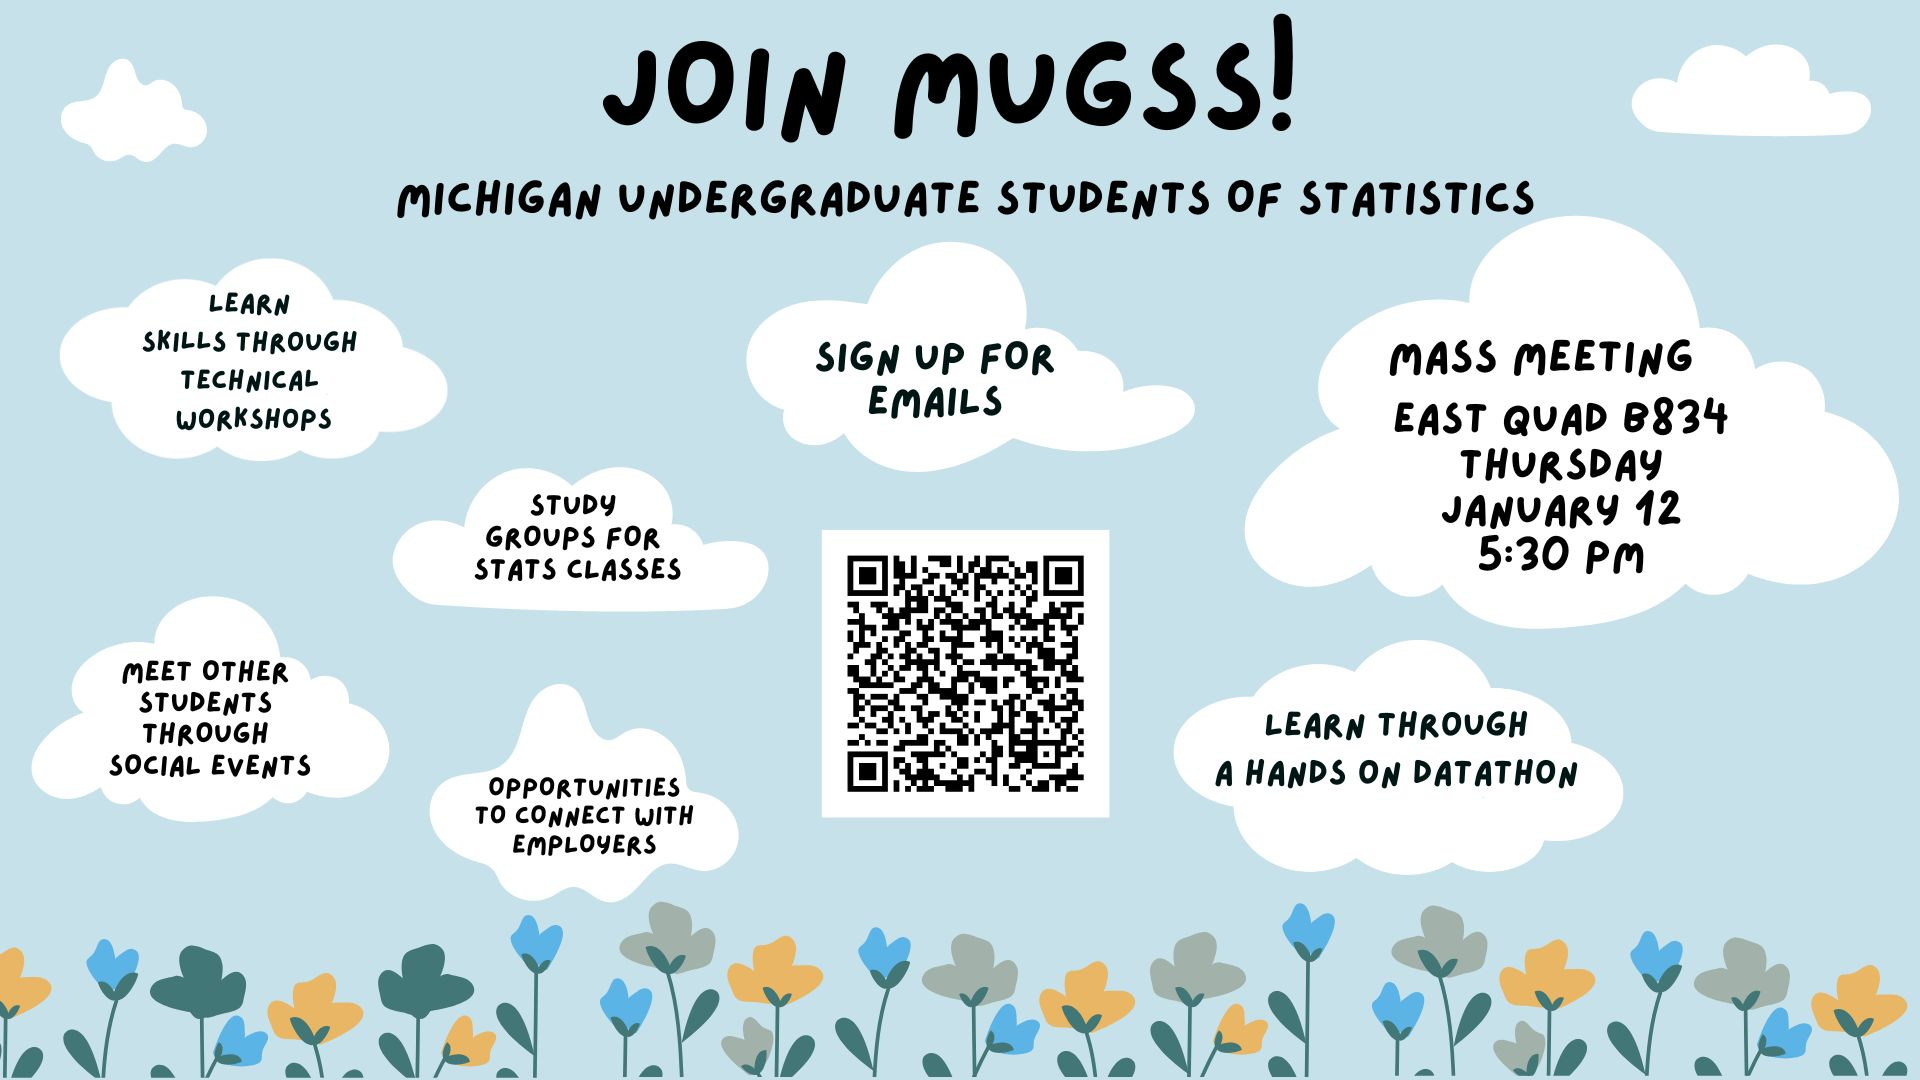

# Lecture 2: More on data transformations

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Continue to learn how to manipulate data, including:
    * Vectors in R: what they are and basic operations
    * Adding new variables
    * Grouping and summarizing data
    
This lecture note corresponds to sections 4.3-4.6 of your book.
</div>

In [ ]:
library(tidyverse)  # always!
library(nycflights13)  # install if needed

## Review of last lecture
Last lecture we learned how to alter the rows and columns of a dataframe:
- `filter()` to keep certain rows that satisfy logical conditions.
- `arrange()` to sort rows according to certain column values.
- `distinct()` to keep only rows that are distinct on some combination of columns.
- `select()` to drop/rename/rearrange columns

## What's a data frame?

Our main goal in R is to work with data, and one of the most fundamental objects in R is the *data frame*. Think of a data frame as a container for a bunch of *vectors* of data:

![dataframe](https://garrettgman.github.io/images/tidy-2.png)

## What's a vector?

- In programming speak: a *vector* is a list of values. 
- In statistical speak: a vector of observations (aka data).

Let's create a vector and work with it:

## Poll
How old are you?
<ol style="list-style-type: upper-alpha;">
    <li>19 or younger</li>
    <li>20</li>
    <li>21</li>
    <li>22 or older</li>
    <li>I forget</li>
</ol>
(This question will be graded.)<br />
(↑ This is a joke.)

The function for creating a vector in R is called simply, `c()`.

In [29]:
# Create a vector of ages

## Functions that operate on vectors

Many summary functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

In [7]:
# examples of functions we can use on the ages vector

## Column operation #2: `mutate()`

`mutate()` creates new columns in a dataframe that are calculated from the existing columns.

For example, let's define the **gain** of a flight to be the different between the departure delay and the arrival delay:

$$\text{gain} = \text{dep. delay} - \text{arr. delay}$$

So, the gain is positive if the flight made up time in the air, resulting in a less-delayed arrival.

To add a column called `gain` to flights, we called `mutate()` as follows:

In [1]:
# add a gain column to flights

The returned data set has a new column called `gain` added to the very end. If you want to bring it to the front, you could use `select()` like we learned last lecture:

In [7]:
# use select to move gain to the first column

## Quiz
What was the most amount of time gained by any flight?
<ol style="list-style-type: upper-alpha;">
    <li>2 hours</li>
    <li>109 minutes</li>
    <li>37 minutes</li>
    <li>37 seconds</li>
    <li>2 days</li>
</ol>

## Filtering extreme values
In the previous question we needed to find rows that had a large value of a certain column (`gain`). This occurs frequently, so the designers of tidyverse wrote a special function:

    top_n(<DATA FRAME>, n, <COLUMN>, ...)
    

In [14]:
# use top_n to find the flights with the highest gain

## Grouping data
Very frequently our data have natural groupings. For example, in flights, we might be interested in studying differences in flights depending on the month of departure. We use the `group_by()` function to tell R how to group data.

For example, `mtcars` is a dataset of cars and the gas mileage they get:

In [25]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Let's try grouping `mtcars` by `cyl` (the number of engine cylinders):

In [26]:
print(group_by(mtcars, cyl))

# A tibble: 32 × 11
# Groups:   cyl [3]
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# … with 22 more rows


This has not changed the data in any way. But now watch what happens when we use `mutate()` on the grouped data frame:

In [28]:
# mean mpg for grouped data

Notice that the mean is now constant within different groups. It's easier to see if we first sort the table by `cyl`:

In [ ]:
# sort mtcars by cyl, then group and mutate

## Pipes
Starting now, we will make extensive use of the pipe operator `%>%`. Consider the previous exercise:

In [43]:
# sort mtcars by cyl, then group, then mutate

This is not very nice. To figure out what the command is doing you have to work from the inside out, which is not the order in which we are accustomed to reading. A slight improvement might be:

In [44]:
# sort mtcars by cyl, then group, then mutate, using intermediates

This is better, but now you've created a bunch of useless temporary variables, and it requires a lot of typing. 
Instead, we are going to use a new operator `%>%` (prounouced "pipe"):

In [ ]:
# sort mtcars by cyl, then group, then mutate, using pipes

This is much better. We can read the command from left to right and know exactly what is going on.

## Column operation #3: `summarize()`ing data

`summarize()` can be used to summarize entire data frames by collapsing them into single number summaries. The syntax is:

    summarize(<grouped data frame>, 
              <new variable> = <formula for new variable>,
              <other new variable> = <other formula>)

The most basic use of summarize is to compute statistics over the whole data set:

In [ ]:
# summarize flights by mean of departure delay

`summarize()` applies a summary function to each group of data. Remember that it always returns **one row per group**. In the above example, there was only one group (the whole data set), so the resulting data frame had only one row.

### Grouping observations
`summarize()` is most useful when combined with `group_by()` to group observations before calculating the summary statistic. Let's summarize flights by the mean departure delay in each month.

In [31]:
# summarize average departure delay by month.

### Example: counting the number of rows
The `n()` function calculates the number of rows in each group:

In [36]:
# count the number of rows in flights for each month

### A shortcut
`summarize(n = n())` occurs so often that there is a shortcut for it:

In [39]:
# use count() instead of group_by or summarize

Let's think about how to answer the following question using `summarize`:

## What days of the year / at what airport are the busiest for flying?

To figure this out, I like to think about/visualize the table we would want to have in order to easily answer this question. Ideally, it would look something like this:

    # A tibble: 1,095 x 4
       month   day airport       n_departures
       <int> <int> <chr>                <int>
     1     1     1 EWR                    305
     2     1     1 JFK                    297
     3     1     1 LGA                    240
     4     1     2 EWR                    350
     5     1     2 JFK                    321
     6     1     2 LGA                    272
     7     1     3 EWR                    336
     8     1     3 JFK                    318
     9     1     3 LGA                    260
    10     1     4 EWR                    339
    # … with 1,085 more rows

Then, to get the answer, I could sort the table to find the row that had the largest `n_departures`.

How do I reach the table shown above? There is one row per ... what? (This tells me how to group the data.)

In [41]:
# summarize flights to get number of departures by day and by airport.

Here is another question we can answer:

## Who is the greatest (baseball) batter of all time?
The `Lahman` dataset contains information on baseball players.

In [51]:
# install.packages("Lahman")
library(Lahman)
as_tibble(Batting) %>% head
# what do all these columns mean?

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0


The second player is `addybo01`. We can get information about this player by typing:

In [53]:
Lahman::playerInfo('addybo01')

,playerID,nameFirst,nameLast
,<chr>,<chr>,<chr>
111,addybo01,Bob,Addy


Bob Addy was active in the years 1871-1877. During that time he had $118+51+152+213+310+142+245=1231$ at-bats, and $32+16+54+51+80+40+68=341$ hits. Therefore his career batting average was $341/1241=0.277$.

In [55]:
filter(Batting, playerID == 'addybo01')

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
addybo01,1873,1,PH2,NA,10,51,12,16,1,⋯,10,1,1,2,0,NA,NA,NA,NA,0
addybo01,1873,2,BS1,NA,31,152,37,54,6,⋯,32,6,5,2,1,NA,NA,NA,NA,0
addybo01,1874,1,HR1,NA,50,213,25,51,9,⋯,22,4,2,1,1,NA,NA,NA,NA,0
addybo01,1875,1,PH2,NA,69,310,60,80,8,⋯,43,16,8,0,2,NA,NA,NA,NA,0
addybo01,1876,1,CHN,NL,32,142,36,40,4,⋯,16,NA,NA,5,0,NA,NA,NA,NA,NA
addybo01,1877,1,CN1,NL,57,245,27,68,2,⋯,31,NA,NA,6,5,NA,NA,NA,NA,NA


Let's use `group_by()` and `summarize()` to calculate the "career" batting average for every player in the dataset. That is, I want a table that looks like:

    # A tibble: 20166 × 2
      playerID batting_avg
      <chr>          <dbl>
    1 addybo01       0.277
    .    .             .
    .    .             .
    .    .             .

In [63]:
# calculate the batting average for each player in the  data set

What has happened? Let's look at the first player in the sorted table:

In [80]:
filter(Batting, playerID == 'abramge01')

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abramge01,1923,1,CIN,NL,3,1,0,1,0,⋯,0,0,0,0,0,NA,0,0,NA,NA


### Always include counts
It is a good idea to include counts of each group when you do a summary. Some groups may have very low numbers of observations, resulting in high variance for the summary statistics. 

What happens if we restrict our batting average calculation to players that had at least 100 at-bats?

## Quiz
Among players who had at least 100 at bats, who had the highest career batting average?
<ol style="list-style-type: upper-alpha;">
    <li>Ty Cobb</li>
    <li>Babe Ruth</li>
    <li>Prof. Terhorst</li>
    <li>Ted Williams</li>
    <li>Hank Williams</li>
</ol>

In [1]:
# highest batting average among players that had 100 or more at bats

## Quiz
Among players who had at least 100 at bats in a season, what was the highest batting average in a single season?
<ol style="list-style-type: upper-alpha;">
    <li>Ted Williams</li>
    <li>Steven Colbert</li>
    <li>Chonky Squirrel</li>
    <li>Levi Meyerle</li>
    <li>Tom Riddle</li>
</ol>

In [94]:
# highest seasonal batting average

## The Steroid Era of Baseball

> [Baseball] remained relatively the same until the 90s when steroid use became rampant. Famous sluggers like Barry Bonds, Mark McGwire, and Sammy Sosa rose to fame during this era. They were beloved at the time until we later found out that they were cheating.

https://www.wagerbop.com/how-home-runs-and-batting-averages-have-changed-over-the-last-30-years/

![barry bounds](https://cdn.ebaumsworld.com/mediaFiles/picture/2605038/87087115.jpg)

## Can we see the steroid era reflected in the data?

In [109]:
# summarize the dataset in order to investigate steroid era in batters